In [91]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [92]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [93]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [94]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [95]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

C:\Users\amrit\AppData\Local\Temp\ipykernel_4816\3601434573.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [115]:
# Print all of the classes mapped to the Base
Key= Base.classes.keys()
Key    

['station', 'measurement']

In [116]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [117]:
# Create a session
session = Session(engine)

In [119]:
#results = session.query(Measurements).all()
#results

# Exploratory Precipitation Analysis

In [120]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
most_recent_date

('2017-08-23',)

In [121]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = (
    session.query(Measurements.date, Measurements.prcp)
    .filter(Measurements.date >= one_year_ago, Measurements.date <= most_recent_date)
    .order_by(Measurements.date)  # Order by date in ascending order
    .all()
)
                  

In [122]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data_df = pd.DataFrame(precip_data, columns=['Date', 'Precipitation'])

print(precip_data_df.head())

         Date  Precipitation
0  2016-08-24            2.0
1  2016-08-24           54.6
2  2016-08-24           57.9
3  2016-08-24            NaN
4  2016-08-24           31.0


In [123]:
# Sort the dataframe by date
precip_data_df = precip_data_df.sort_values(by='Date')
print(precip_data_df.head())

         Date  Precipitation
0  2016-08-24            2.0
1  2016-08-24           54.6
2  2016-08-24           57.9
3  2016-08-24            NaN
4  2016-08-24           31.0


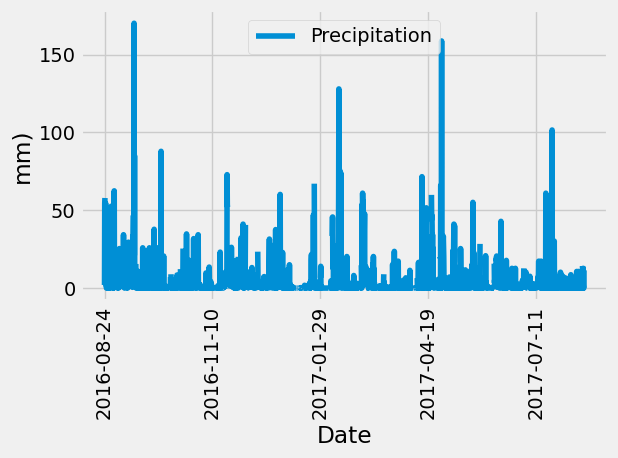

In [126]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot(x='Date', y='Precipitation', kind='line', legend=True)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("mm)")
plt.title("")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [107]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data_df.describe()


,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [129]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Stations.station).distinct().count()
total_stations


9

In [130]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()

# Convert the result directly to a list of tuples
most_active_stations = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()  # Retrieve all results

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [131]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]

temperature_stats = (
    session.query(
        func.min(Measurements.tobs).label('min_temp'),
        func.max(Measurements.tobs).label('max_temp'),
        func.avg(Measurements.tobs).label('avg_temp')
    )
    .filter(Measurements.station == most_active_station_id)
    .one()
)

# Print the results
print(f"[({temperature_stats.min_temp},{temperature_stats.max_temp}, {temperature_stats.avg_temp})]")

[(12.2,29.4, 22.035822510822513)]


In [132]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_data = (
    session.query(Measurements.tobs)
    .filter(Measurements.station == most_active_station_id)
    .filter(Measurements.date >= one_year_ago)
    .all()
)

temperatures = [temp[0] for temp in temperature_data]


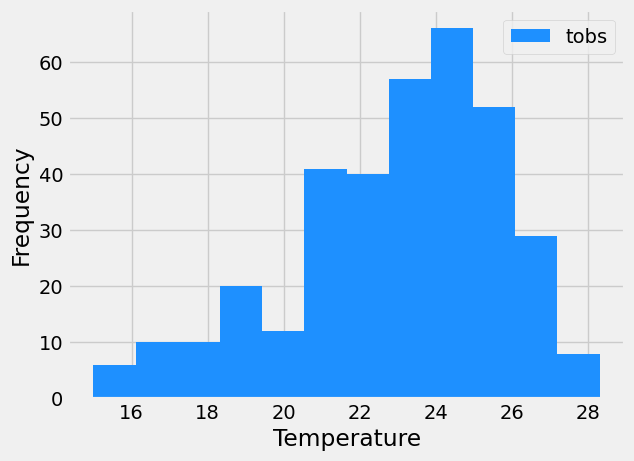

In [133]:
# Plot the Histogram
plt.hist(temperatures, bins=12, color='dodgerblue', label='tobs')
plt.title(f"")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

# Close Session

In [135]:
# Close Session
session.close()
